In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/hotel_bookings.csv")

Dataset Description


In [3]:

# Count the instances of each class in OUTCOME
class_counts = dataset['children'].value_counts()
print("Class Distribution:")
print(class_counts)
print("\nNormalized Class Distribution:")
print(dataset['children'].value_counts(normalize=True))

# Check if classes are balanced
if class_counts[0] == class_counts[1]:
    print("The classes have an equal number of instances.")
else:
    print("The classes do NOT have an equal number of instances (imbalanced).")

Class Distribution:
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

Normalized Class Distribution:
children
0.0     0.928049
1.0     0.040717
2.0     0.030590
3.0     0.000637
10.0    0.000008
Name: proportion, dtype: float64
The classes do NOT have an equal number of instances (imbalanced).


Correlation heatmap


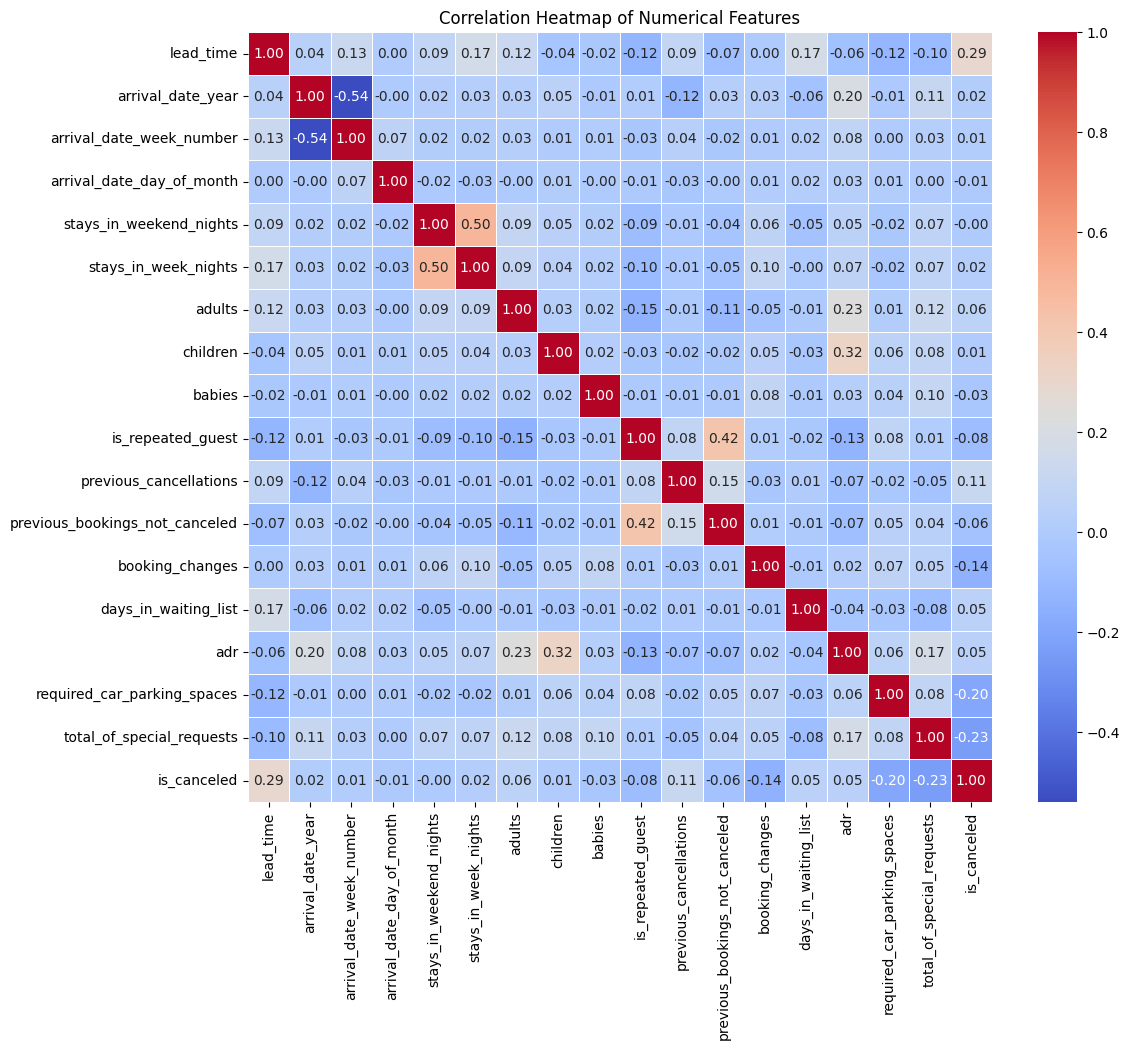

In [4]:


# Select numerical features
numerical_features = [
    'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled'
]

# Compute correlation matrix
corr_matrix = dataset[numerical_features].corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [5]:
#features

num_features = dataset.shape[1]
print(f"Number of Features: {num_features}")

Number of Features: 32


In [6]:
#data points

num_datapoints = dataset.shape[0]
print(f"\nNumber of Data Points: {num_datapoints}")



Number of Data Points: 119390


In [7]:
# Count the instances of each class in is_canceled

class_counts = dataset['is_canceled'].value_counts()
print("Class Distribution:")
print(class_counts)
print("\nNormalized Class Distribution:")
print(dataset['is_canceled'].value_counts(normalize=True))

# Checking if classes are balanced

if class_counts[0] == class_counts[1]:
    print("The classes have an equal number of instances.")
else:
    print("The classes do NOT have an equal number of instances (imbalanced).")

Class Distribution:
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Normalized Class Distribution:
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64
The classes do NOT have an equal number of instances (imbalanced).


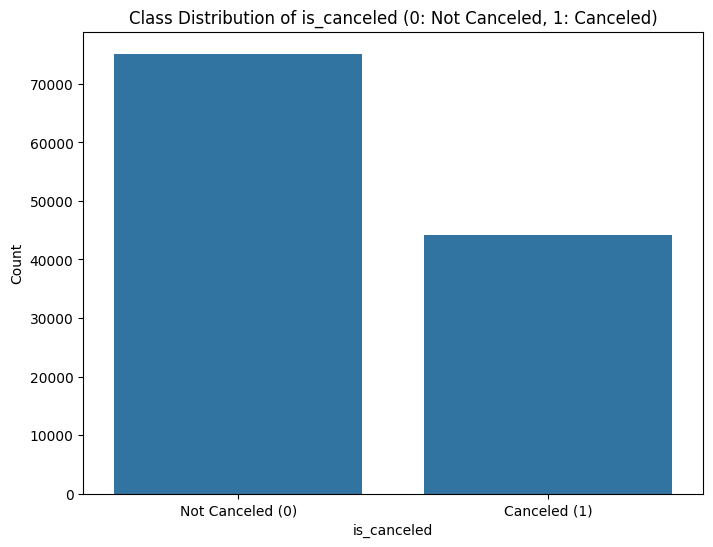

In [8]:
# Creating a bar chart for is_canceled class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=dataset)
plt.title('Class Distribution of is_canceled (0: Not Canceled, 1: Canceled)')
plt.xlabel('is_canceled')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Canceled (0)', 'Canceled (1)'])
plt.show()


Dataset Pre Processing

In [9]:

# Loading the dataset
dataset = pd.read_csv("/content/hotel_bookings.csv")

# Initial missing values
print("Missing Values Before Pre-processing:")
print(dataset.isnull().sum())

# 1. Deleting company column
dataset = dataset.drop(columns=['company'], errors='ignore')
print("\nDropped 'company' column due to ~94.31% missing values.")

# 2. Deleting rows with missing children or country
initial_rows = dataset.shape[0]
dataset = dataset.dropna(subset=['children', 'country'])
rows_dropped = initial_rows - dataset.shape[0]
print(f"\nDropped {rows_dropped} rows with missing 'children' or 'country' (<0.5% of data).")

# 3. Impute agent with 0
dataset['agent'] = dataset['agent'].fillna(0)
print("\nImputed missing 'agent' values with 0 (indicating no agent).")

# Verifying missing values after pre-processing
print("\nMissing Values After Pre-processing:")
print(dataset.isnull().sum())

# Saving pre-processed dataset (optional!!!)
dataset.to_csv("hotel_bookings_cleaned_missing.csv", index=False)

Missing Values Before Pre-processing:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent              

In [10]:

# Loading the dataset (after missing value handling)
dataset = pd.read_csv("hotel_bookings_cleaned_missing.csv")

# 1. Droping reservation_status and reservation_status_date
dataset = dataset.drop(columns=['reservation_status', 'reservation_status_date',
                              'reserved_room_type', 'assigned_room_type'], errors='ignore')
print("Dropped 'reservation_status', 'reservation_status_date', 'reserved_room_type', "
      "'assigned_room_type' to prevent data leakage or reduce complexity.")

# 2. Binary features (already encoded)
print("\nRetained binary features: is_repeated_guest, required_car_parking_spaces")

# 3. One-hot encoding for low-cardinality nominal features
one_hot_features = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'deposit_type', 'customer_type']
dataset = pd.get_dummies(dataset, columns=one_hot_features, drop_first=True)
print("\nApplied one-hot encoding to:", one_hot_features)

# 4. Label encoding for arrival_date_month
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
                 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
                 'November': 11, 'December': 12}
dataset['arrival_date_month'] = dataset['arrival_date_month'].map(month_mapping)
print("\nApplied label encoding to 'arrival_date_month' (1=January, 12=December).")

# 5. Frequency encoding for country
country_freq = dataset['country'].value_counts(normalize=True)
dataset['country'] = dataset['country'].map(country_freq)
print("\nApplied frequency encoding to 'country' based on value counts.")

# Verifying dataset after encoding
print("\nDataset Info After Categorical Encoding:")
print(dataset.info())

# Saving pre-processed dataset (optional)
dataset.to_csv("hotel_bookings_cleaned_categorical.csv", index=False)

Dropped 'reservation_status', 'reservation_status_date', 'reserved_room_type', 'assigned_room_type' to prevent data leakage or reduce complexity.

Retained binary features: is_repeated_guest, required_car_parking_spaces

Applied one-hot encoding to: ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']

Applied label encoding to 'arrival_date_month' (1=January, 12=December).

Applied frequency encoding to 'country' based on value counts.

Dataset Info After Categorical Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118898 non-null  int64  
 1   lead_time                       118898 non-null  int64  
 2   arrival_date_year               118898 non-null  int64  
 3   arrival_date_month              118898 non-null  in

In [11]:

from sklearn.preprocessing import MinMaxScaler

# Loading the dataset (after categorical encoding)
dataset = pd.read_csv("hotel_bookings_cleaned_categorical.csv")

# Identify numerical features to scale (exclude binary and one-hot encoded)
numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                     'arrival_date_day_of_month', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'adults', 'children', 'babies',
                     'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
                     'total_of_special_requests', 'country', 'arrival_date_month']

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Applying scaling to numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Verifying scaling
print("Summary Statistics After Normalization (should be in [0, 1]):")
print(dataset[numerical_features].describe())

# Saving pre-processed dataset (optional)
dataset.to_csv("hotel_bookings_cleaned_scaled.csv", index=False)

Summary Statistics After Normalization (should be in [0, 1]):
           lead_time  arrival_date_year  arrival_date_week_number  \
count  118898.000000      118898.000000             118898.000000   
mean        0.141535           0.578828                  0.503203   
std         0.145052           0.353729                  0.261346   
min         0.000000           0.000000                  0.000000   
25%         0.024423           0.500000                  0.288462   
50%         0.093623           0.500000                  0.519231   
75%         0.218453           1.000000                  0.711538   
max         1.000000           1.000000                  1.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              118898.000000            118898.000000   
mean                    0.493363                 0.058056   
std                     0.292677                 0.062264   
min                     0.000000                 0.000000   
25%        

In [12]:

# Loading the dataset
dataset = pd.read_csv("/content/hotel_bookings.csv")

# 1. Handling Missing Values
dataset = dataset.drop(columns=['company'], errors='ignore')
dataset = dataset.dropna(subset=['children', 'country'])
dataset['agent'] = dataset['agent'].fillna(0)

# 2. Handling Categorical Values
dataset = dataset.drop(columns=['reservation_status', 'reservation_status_date',
                              'reserved_room_type', 'assigned_room_type'], errors='ignore')
one_hot_features = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                    'deposit_type', 'customer_type']
dataset = pd.get_dummies(dataset, columns=one_hot_features, drop_first=True)
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
                 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
                 'November': 11, 'December': 12}
dataset['arrival_date_month'] = dataset['arrival_date_month'].map(month_mapping)
country_freq = dataset['country'].value_counts(normalize=True)
dataset['country'] = dataset['country'].map(country_freq)

# 3. Feature Scaling
numerical_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number',
                     'arrival_date_day_of_month', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'adults', 'children', 'babies',
                     'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
                     'total_of_special_requests', 'country', 'arrival_date_month']
scaler = MinMaxScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Final dataset info
print("Final Pre-processed Dataset Info:")
print(dataset.info())
print("\nSummary Statistics:")
print(dataset.describe())

# Save final dataset
dataset.to_csv("hotel_bookings_preprocessed_final.csv", index=False)

Final Pre-processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118898 non-null  int64  
 1   lead_time                       118898 non-null  float64
 2   arrival_date_year               118898 non-null  float64
 3   arrival_date_month              118898 non-null  float64
 4   arrival_date_week_number        118898 non-null  float64
 5   arrival_date_day_of_month       118898 non-null  float64
 6   stays_in_weekend_nights         118898 non-null  float64
 7   stays_in_week_nights            118898 non-null  float64
 8   adults                          118898 non-null  float64
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  float64
 11  country                         118898 non-null  

Dataset Splitting

In [13]:

from sklearn.model_selection import train_test_split

# Loading the pre-processed dataset
dataset = pd.read_csv("hotel_bookings_preprocessed_final.csv")

# Separating features (X) and target (y)
X = dataset.drop(columns=['is_canceled'])
y = dataset['is_canceled']

# Performing stratified splitting: 70% train, 30% test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42, stratify=y
)

# Verifying sizes
print("Training Set Size:", X_train.shape, y_train.shape)
print("Test Set Size:", X_test.shape, y_test.shape)

# Verifying class distribution
print("\nClass Distribution in Original Dataset:")
print(y.value_counts(normalize=True))
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nClass Distribution in Test Set:")
print(y_test.value_counts(normalize=True))

# Save train and test sets
X_train.to_csv("hotel_bookings_X_train.csv", index=False)
y_train.to_csv("hotel_bookings_y_train.csv", index=False)
X_test.to_csv("hotel_bookings_X_test.csv", index=False)
y_test.to_csv("hotel_bookings_y_test.csv", index=False)
print("\nSaved train and test sets to CSV files.")

Training Set Size: (83228, 40) (83228,)
Test Set Size: (35670, 40) (35670,)

Class Distribution in Original Dataset:
is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64

Class Distribution in Training Set:
is_canceled
0    0.628647
1    0.371353
Name: proportion, dtype: float64

Class Distribution in Test Set:
is_canceled
0    0.628652
1    0.371348
Name: proportion, dtype: float64

Saved train and test sets to CSV files.


Model Training and Testing


Logistic Regression Performance:
Accuracy: 0.7992
Precision: 0.8023
Recall: 0.6093
F1-Score: 0.6926
Confusion Matrix:
[[20435  1989]
 [ 5175  8071]]


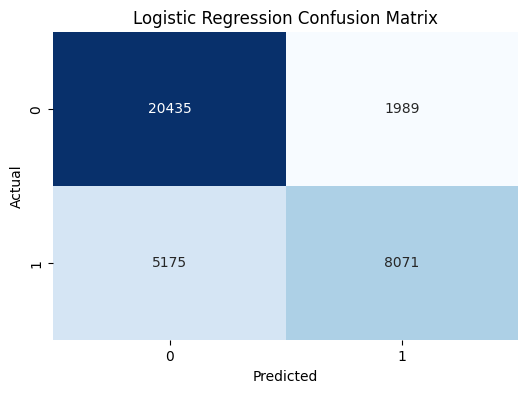


Decision Tree Performance:
Accuracy: 0.8005
Precision: 0.7068
Recall: 0.7907
F1-Score: 0.7464
Confusion Matrix:
[[18080  4344]
 [ 2773 10473]]


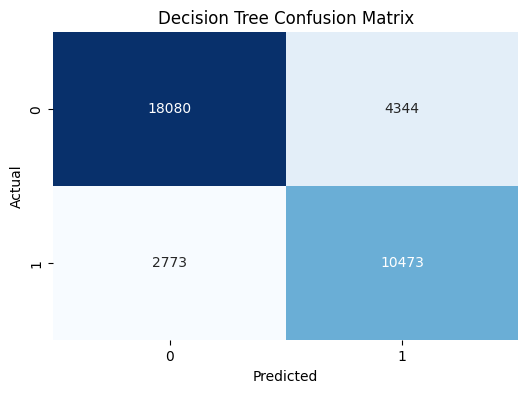

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Neural Network Performance:
Accuracy: 0.8502
Precision: 0.8136
Recall: 0.7739
F1-Score: 0.7932
Confusion Matrix:
[[20075  2349]
 [ 2995 10251]]


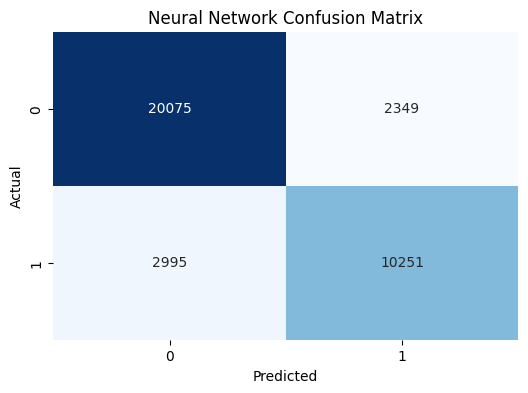


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.799159   0.802286  0.609316  0.692611
1        Decision Tree  0.800477   0.706823  0.790654  0.746392
2       Neural Network  0.850182   0.813571  0.773894  0.793237


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Loading train and test sets
X_train = pd.read_csv("hotel_bookings_X_train.csv")
y_train = pd.read_csv("hotel_bookings_y_train.csv")
X_test = pd.read_csv("hotel_bookings_X_test.csv")
y_test = pd.read_csv("hotel_bookings_y_test.csv")

# Ensuring y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# 2. Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

# 3. Neural Network
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
y_pred_nn = (nn.predict(X_test) > 0.5).astype(int).ravel()
nn_metrics = evaluate_model(y_test, y_pred_nn, "Neural Network")

# Comparing models
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network'],
    'Accuracy': [log_reg_metrics[0], dt_metrics[0], nn_metrics[0]],
    'Precision': [log_reg_metrics[1], dt_metrics[1], nn_metrics[1]],
    'Recall': [log_reg_metrics[2], dt_metrics[2], nn_metrics[2]],
    'F1-Score': [log_reg_metrics[3], dt_metrics[3], nn_metrics[3]]
})
print("\nModel Comparison:")
print(metrics_df)

# Saving metrics to CSV (optional!!!)
metrics_df.to_csv("model_performance_metrics.csv", index=False)

Unsupervised Learning: K-Means Clustering

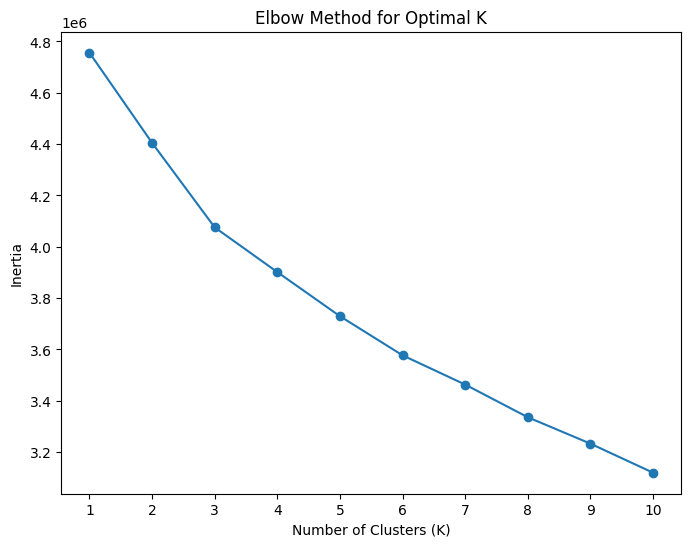

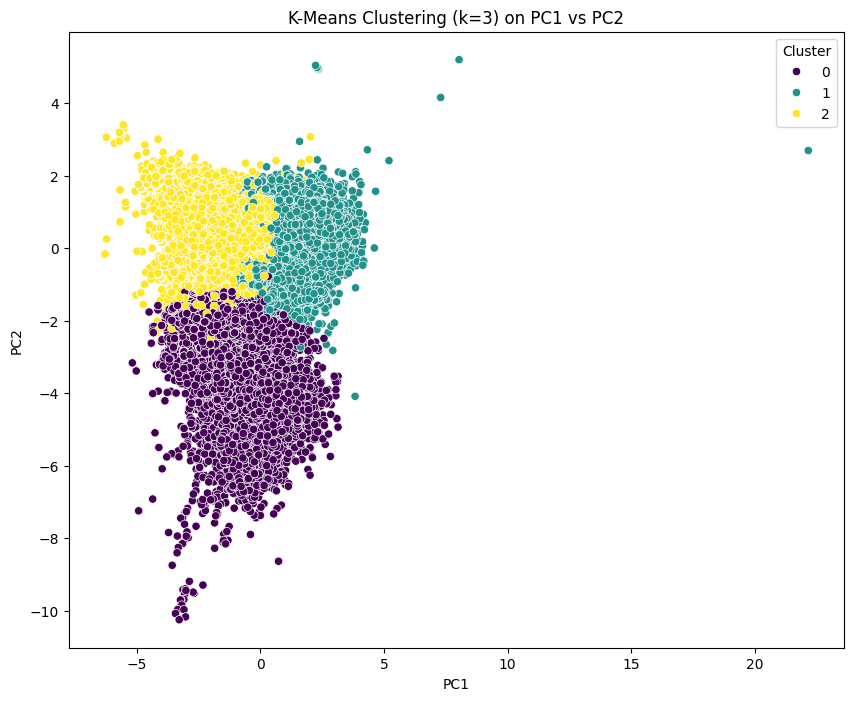

Cluster Analysis (Mean values of features per cluster):
         is_canceled  lead_time  arrival_date_year  arrival_date_month  \
Cluster                                                                  
0           0.171706   0.058025           0.575905            0.486330   
1           0.361647   0.111678           0.650294            0.490278   
2           0.473577   0.218616           0.485060            0.532404   

         arrival_date_week_number  arrival_date_day_of_month  \
Cluster                                                        
0                        0.487207                   0.501422   
1                        0.489244                   0.493260   
2                        0.528930                   0.489893   

         stays_in_weekend_nights  stays_in_week_nights    adults  children  \
Cluster                                                                      
0                       0.045208              0.051622  0.030534  0.012324   
1                 

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the pre-processed dataset
dataset = pd.read_csv("hotel_bookings_preprocessed_final.csv")

# Excluding the target variable 'is_canceled' for unsupervised learning
X_unsupervised = dataset.drop(columns=['is_canceled'])

# Using StandardScaler for K-Means as it's sensitive to feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

k = 3
kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X_scaled)

dataset['Cluster'] = clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.title(f'K-Means Clustering (k={k}) on PC1 vs PC2')
plt.show()

cluster_analysis = dataset.groupby('Cluster').mean()
print("Cluster Analysis (Mean values of features per cluster):")
print(cluster_analysis)

Model Selection and Comparison analysis

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Model Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.799159   0.802286  0.609316  0.692611  0.879846
1        Decision Tree  0.800477   0.706823  0.790654  0.746392  0.879398
2       Neural Network  0.851836   0.821086  0.768458  0.793901  0.929417


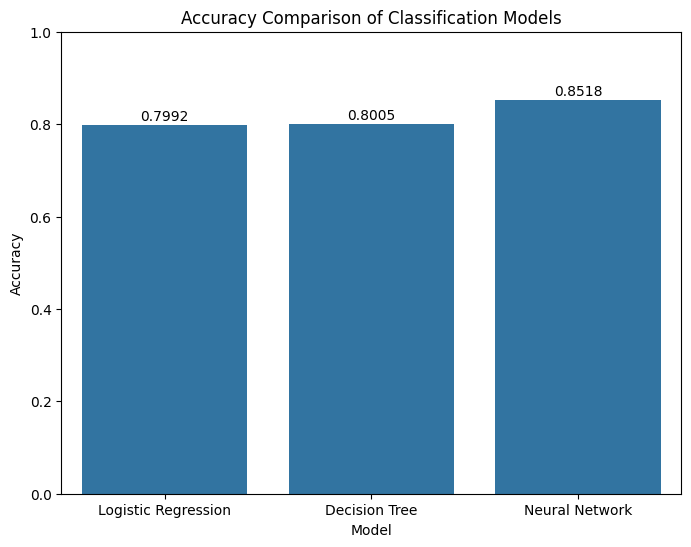

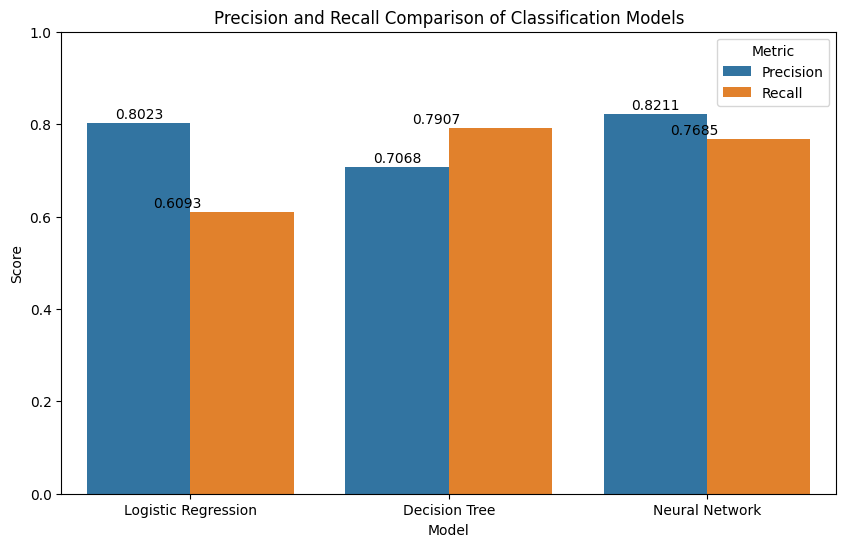

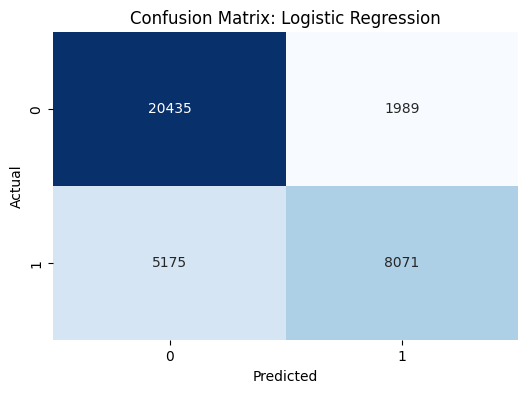

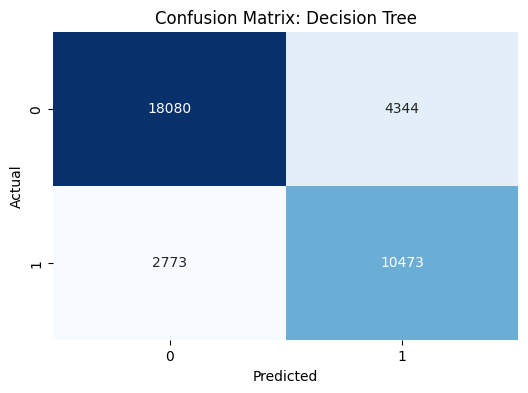

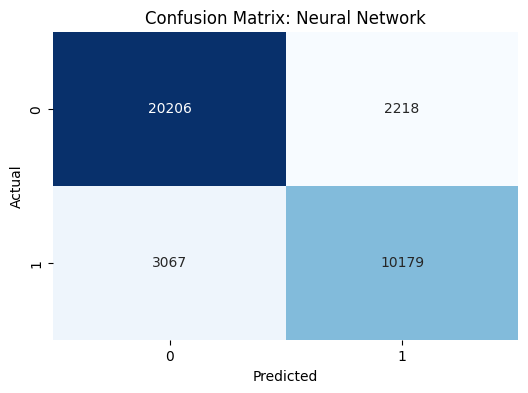

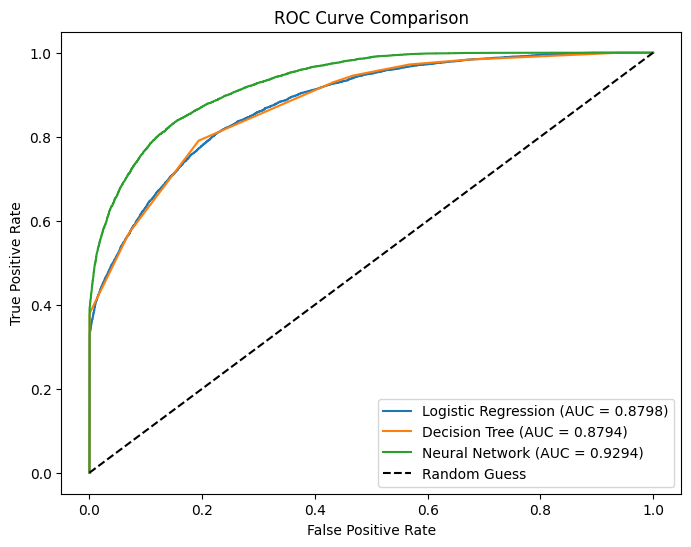


Saved performance metrics to 'model_performance_metrics.csv'.


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Loading train and test sets
X_train = pd.read_csv("hotel_bookings_X_train.csv")
y_train = pd.read_csv("hotel_bookings_y_train.csv")
X_test = pd.read_csv("hotel_bookings_X_test.csv")
y_test = pd.read_csv("hotel_bookings_y_test.csv")

# Ensuring y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Neural Network": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Training and predicting
predictions = {}
proba_predictions = {}
metrics = []

for name, model in models.items():
    if name == "Neural Network":
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = (model.predict(X_test) > 0.5).astype(int).ravel()
        y_proba = model.predict(X_test).ravel()
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    predictions[name] = y_pred
    proba_predictions[name] = y_proba

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

# Creating metrics DataFrame
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Metrics:")
print(metrics_df)

# 1. Bar Chart for Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", data=metrics_df)
plt.title("Accuracy Comparison of Classification Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(metrics_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

# 2. Precision and Recall Comparison
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars="Model", value_vars=["Precision", "Recall"],
                                 var_name="Metric", value_name="Score")
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_melted)
plt.title("Precision and Recall Comparison of Classification Models")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(metrics_melted["Score"]):
    plt.text(i % 3 + (i // 3) * 0.15 - 0.2, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

# 3. Confusion Matrices
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 4. ROC Curve and AUC Score
plt.figure(figsize=(8, 6))
for name, y_proba in proba_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Saving metrics to CSV
metrics_df.to_csv("model_performance_metrics.csv", index=False)
print("\nSaved performance metrics to 'model_performance_metrics.csv'.")